# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
sns.set_style('darkgrid')

# Load the Dataset and see the head and tail of the dataset. 

In [2]:
df_covid = pd.read_csv('PK COVID-19.csv')

In [3]:
df_covid.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [4]:
df_covid.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura
846,4/19/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Bhakhar
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,Total,8415.0,168.0,2135.0,NaN,NaN,NaN


# See the Shape and Info of the dataset.

In [5]:
df_covid.shape

(850, 7)

In [6]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            848 non-null    object 
 1   Cases           848 non-null    float64
 2   Deaths          848 non-null    float64
 3   Recovered       848 non-null    float64
 4   Travel_history  847 non-null    object 
 5   Province        847 non-null    object 
 6   City            847 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.6+ KB


# Dropping the rows which contain missing values in our dataset.

In [7]:
df_new = df_covid.dropna()

# Again  See the Head, Shape and Info of the dataset.

In [8]:
df_new.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [9]:
df_new.shape

(847, 7)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            847 non-null    object 
 1   Cases           847 non-null    float64
 2   Deaths          847 non-null    float64
 3   Recovered       847 non-null    float64
 4   Travel_history  847 non-null    object 
 5   Province        847 non-null    object 
 6   City            847 non-null    object 
dtypes: float64(3), object(4)
memory usage: 52.9+ KB


# Change the Date column data type from object to datetime.

In [11]:
df_new['Date'] = pd.to_datetime(df_new['Date'],dayfirst=True, errors='coerce')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            847 non-null    datetime64[ns]
 1   Cases           847 non-null    float64       
 2   Deaths          847 non-null    float64       
 3   Recovered       847 non-null    float64       
 4   Travel_history  847 non-null    object        
 5   Province        847 non-null    object        
 6   City            847 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 52.9+ KB


<ipython-input-11-df00f06ae8c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'],dayfirst=True, errors='coerce')


# See all the Summary Statistics of our dataset.

In [12]:
df_new.describe(include='all')

<ipython-input-12-cc771a60e0cc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_new.describe(include='all')


,Date,Cases,Deaths,Recovered,Travel_history,Province,City
count,847,847.000000,847.000000,847.000000,847,847,847
unique,46,NaN,NaN,NaN,15,9,105
top,2020-04-14 00:00:00,NaN,NaN,NaN,Local - Social Contact,Punjab,Karachi
freq,51,NaN,NaN,NaN,608,298,48
first,2020-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.935065,0.198347,2.520661,NaN,NaN,NaN
std,NaN,22.721862,0.790515,16.062577,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN


# How many Cases are Report in Each Province.

In [13]:
df_pr_ca_sum = df_new.groupby('Province')['Cases'].sum().sort_values(ascending=False)
df_pr_ca_sum

Province
Punjab                                3777.0
Sindh                                 2611.0
Khyber Pakhtunkhwa                    1076.0
Baluchistan                            415.0
Gilgit-Baltistan                       263.0
Islamabad Capital Territory            176.0
Azad Jummu Kashmir                      49.0
Federal Administration Tribal Area      46.0
khyber Pakhtunkhwa                       2.0
Name: Cases, dtype: float64

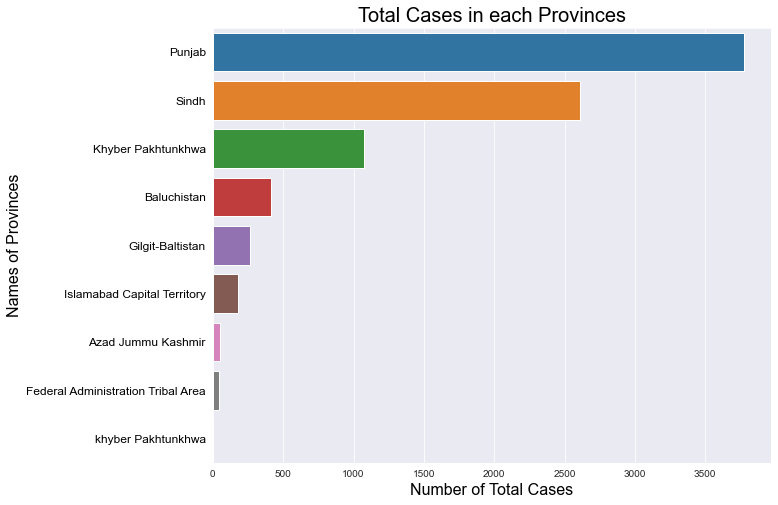

In [14]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_pr_ca_sum.values, y=df_pr_ca_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Cases', fontsize = 16, color='black')
plt.ylabel('Names of Provinces', fontsize = 16, color='black')
plt.title('Total Cases in each Provinces', fontsize = 20, color='black')
plt.show()

# How many Deaths are Report in Each Province.

In [15]:
df_pr_de_sum = df_new.groupby('Province')['Deaths'].sum().sort_values(ascending=False)
df_pr_de_sum

Province
Khyber Pakhtunkhwa                    61.0
Sindh                                 56.0
Punjab                                41.0
Baluchistan                            5.0
Gilgit-Baltistan                       3.0
Islamabad Capital Territory            2.0
khyber Pakhtunkhwa                     0.0
Federal Administration Tribal Area     0.0
Azad Jummu Kashmir                     0.0
Name: Deaths, dtype: float64

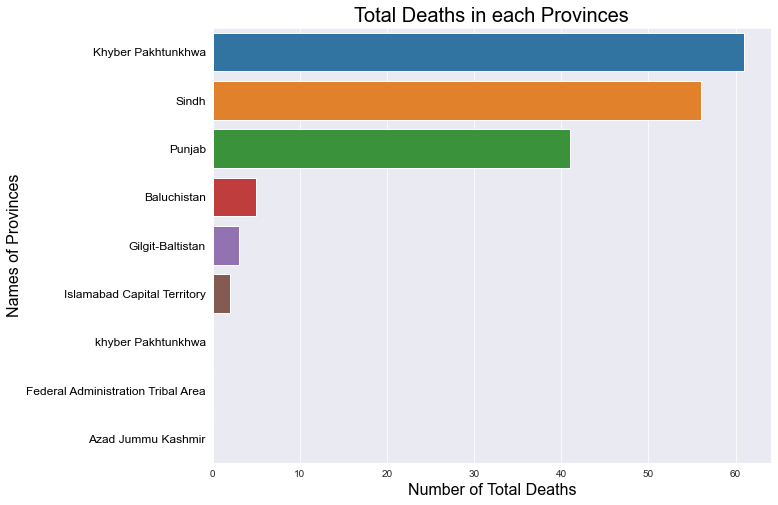

In [16]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_pr_de_sum.values, y=df_pr_de_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Deaths', fontsize = 16, color='black')
plt.ylabel('Names of Provinces', fontsize = 16, color='black')
plt.title('Total Deaths in each Provinces', fontsize = 20, color='black')
plt.show()

# How many Recovery are Report in Each Province.

In [17]:
df_pr_re_sum = df_new.groupby('Province')['Recovered'].sum().sort_values(ascending=False)
df_pr_re_sum

Province
Sindh                                 865.0
Punjab                                685.0
Khyber Pakhtunkhwa                    196.0
Gilgit-Baltistan                      195.0
Baluchistan                           167.0
Islamabad Capital Territory            15.0
Federal Administration Tribal Area     11.0
Azad Jummu Kashmir                      1.0
khyber Pakhtunkhwa                      0.0
Name: Recovered, dtype: float64

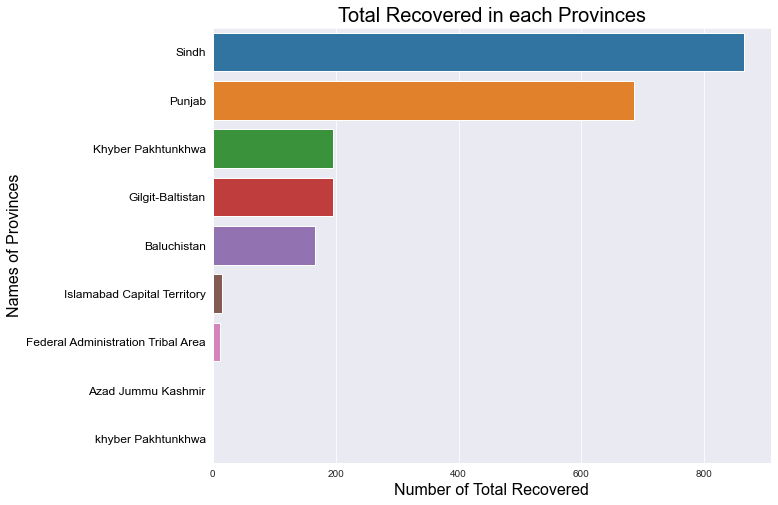

In [18]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_pr_re_sum.values, y=df_pr_re_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Recovered', fontsize = 16, color='black')
plt.ylabel('Names of Provinces', fontsize = 16, color='black')
plt.title('Total Recovered in each Provinces', fontsize = 20, color='black')
plt.show()

# How many Cases are Report in Each Travel History.

In [19]:
df_th_ca_sum = df_new.groupby('Travel_history')['Cases'].sum().sort_values(ascending=False)
df_th_ca_sum

Travel_history
Local - Social Contact     4313.0
Unknown                    1858.0
Iran/Taftan                1051.0
Tableeghi Jamaat           1018.0
Jail                        101.0
International Passenger      30.0
Tableegi Jamaat              19.0
Syria                         7.0
KSA                           6.0
UK                            5.0
India                         2.0
China                         2.0
USA                           1.0
Local - Covid Relative        1.0
Dubai                         1.0
Name: Cases, dtype: float64

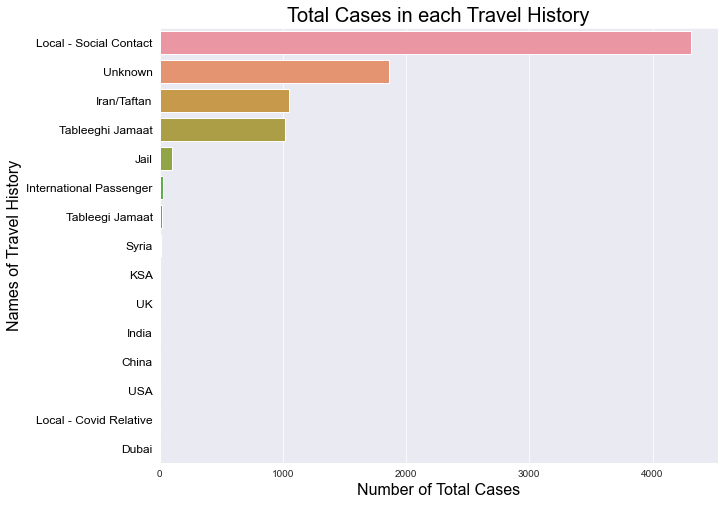

In [20]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_th_ca_sum.values, y=df_th_ca_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Cases', fontsize = 16, color='black')
plt.ylabel('Names of Travel History', fontsize = 16, color='black')
plt.title('Total Cases in each Travel History', fontsize = 20, color='black')
plt.show()

# How many Deaths are Report in Each Travel History.

In [21]:
df_th_de_sum = df_new.groupby('Travel_history')['Deaths'].sum().sort_values(ascending=False)
df_th_de_sum

Travel_history
Local - Social Contact     107.0
Unknown                     44.0
Iran/Taftan                 11.0
Tableeghi Jamaat             3.0
Tableegi Jamaat              2.0
KSA                          1.0
USA                          0.0
UK                           0.0
Syria                        0.0
Local - Covid Relative       0.0
Jail                         0.0
International Passenger      0.0
India                        0.0
Dubai                        0.0
China                        0.0
Name: Deaths, dtype: float64

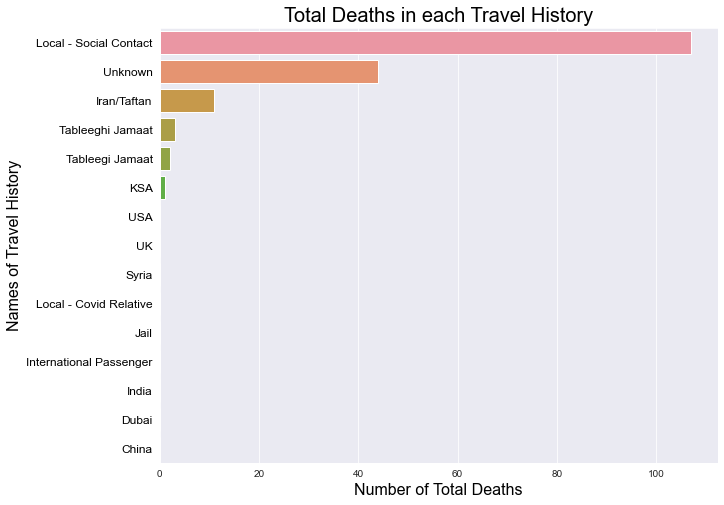

In [22]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_th_de_sum.values, y=df_th_de_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Deaths', fontsize = 16, color='black')
plt.ylabel('Names of Travel History', fontsize = 16, color='black')
plt.title('Total Deaths in each Travel History', fontsize = 20, color='black')
plt.show()

# How many Recovery are Report in Each Travel History. 

In [23]:
df_th_re_sum = df_new.groupby('Travel_history')['Recovered'].sum().sort_values(ascending=False)
df_th_re_sum

Travel_history
Local - Social Contact     896.0
Iran/Taftan                599.0
Tableeghi Jamaat           366.0
Unknown                    239.0
India                       25.0
Tableegi Jamaat              9.0
Dubai                        1.0
USA                          0.0
UK                           0.0
Syria                        0.0
Local - Covid Relative       0.0
KSA                          0.0
Jail                         0.0
International Passenger      0.0
China                        0.0
Name: Recovered, dtype: float64

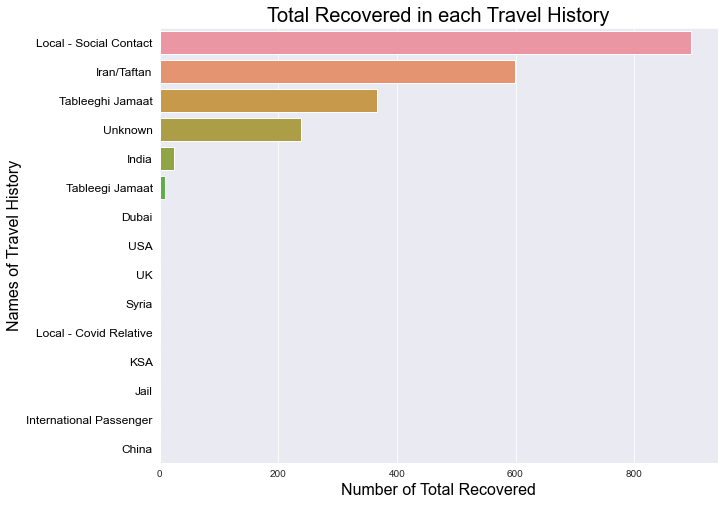

In [24]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_th_re_sum.values, y=df_th_re_sum.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Recovered', fontsize = 16, color='black')
plt.ylabel('Names of Travel History', fontsize = 16, color='black')
plt.title('Total Recovered in each Travel History', fontsize = 20, color='black')
plt.show()

# How many Cases are Report in Each City.

In [25]:
df_city_ca_sum = df_new.groupby('City')['Cases'].sum().sort_values(ascending=False)
df_city_ca_sum.head(10)

City
Karachi            1610.0
Multan              712.0
Lahore              688.0
Raiwind             546.0
Peshawar            403.0
Quetta              403.0
Sukkur              326.0
Dera Ghazi Khan     247.0
Hyderabad           197.0
Rawalpindi          187.0
Name: Cases, dtype: float64

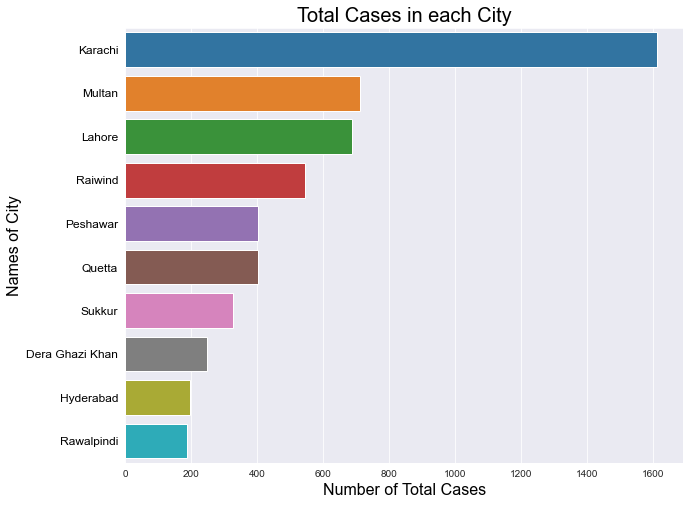

In [26]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_city_ca_sum.head(10).values, y=df_city_ca_sum.head(10).index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Cases', fontsize = 16, color='black')
plt.ylabel('Names of City', fontsize = 16, color='black')
plt.title('Total Cases in each City', fontsize = 20, color='black')
plt.show()

# How many Deaths are Report in Each City.

In [27]:
df_city_de_sum = df_new.groupby('City')['Deaths'].sum().sort_values(ascending=False)
df_city_de_sum.head(10)

City
Karachi            52.0
Peshawar           36.0
Lahore             30.0
Dera Ghazi Khan     6.0
Quetta              5.0
Swat                4.0
Mardan              3.0
Hyderabad           3.0
Kohat               2.0
Nowshera            2.0
Name: Deaths, dtype: float64

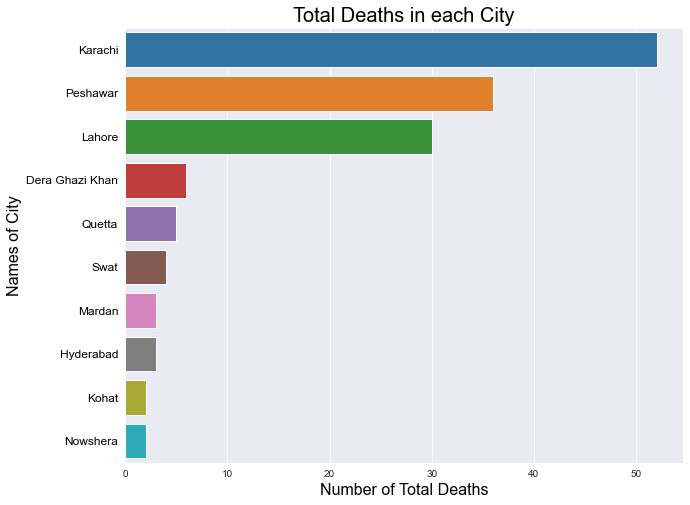

In [28]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_city_de_sum.head(10).values, y=df_city_de_sum.head(10).index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Deaths', fontsize = 16, color='black')
plt.ylabel('Names of City', fontsize = 16, color='black')
plt.title('Total Deaths in each City', fontsize = 20, color='black')
plt.show()

# How many Recovery are Report in Each City.

In [29]:
df_city_re_sum = df_new.groupby('City')['Recovered'].sum().sort_values(ascending=False)
df_city_re_sum.head(10)

City
Sukkur              544.0
Dera Ghazi Khan     415.0
Lahore              224.0
Karachi             211.0
Quetta              167.0
Hyderabad           108.0
Skardu               65.0
Dera Ismail Khan     64.0
Nagar                60.0
Gilgit               34.0
Name: Recovered, dtype: float64

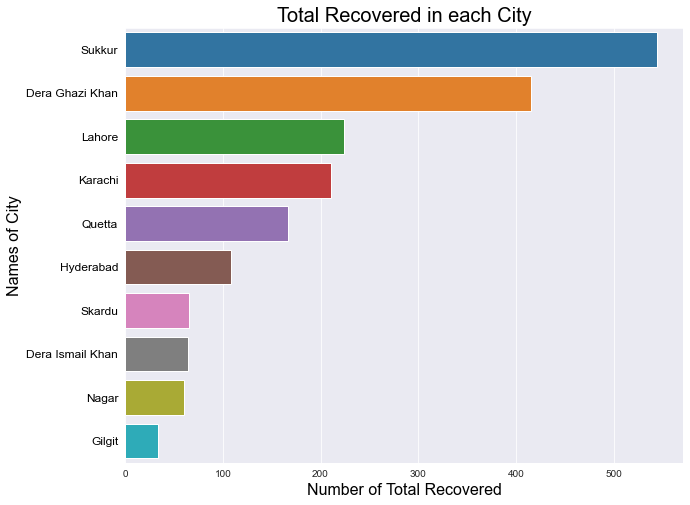

In [30]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_city_re_sum.head(10).values, y=df_city_re_sum.head(10).index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Number of Total Recovered', fontsize = 16, color='black')
plt.ylabel('Names of City', fontsize = 16, color='black')
plt.title('Total Recovered in each City', fontsize = 20, color='black')
plt.show()

# Frequently City Names in our Dataset.

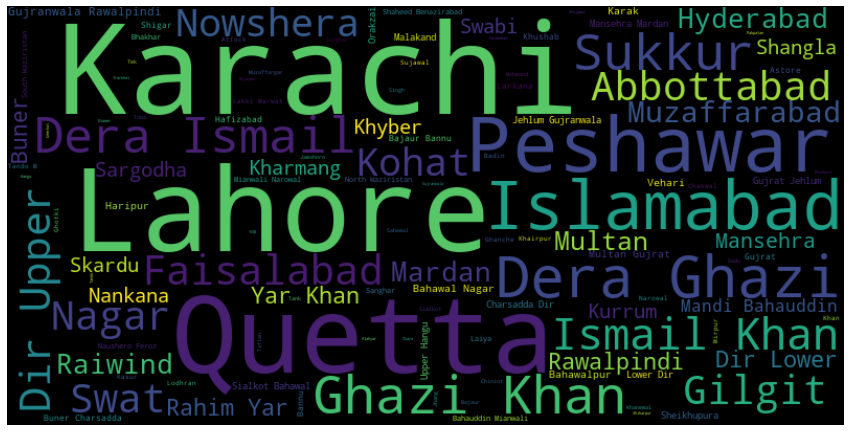

In [31]:
# visualize the frequent city names.
# Plot the word cloud.
all_word = ' '.join([sentence for sentence in df_new['City']])
word_cloud = WordCloud(width = 800, height = 400, random_state = 42, max_font_size = 120).generate(all_word)

# visualize the graph.
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()